# Quick graph creation

####  Libraries

In [3]:
import spacy
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [6]:
kg_df = pd.read_csv("../assets/input-data-for-graph.csv")

In [14]:
kg_df.head(20 +1)

,source,relation,target
0,NSW,has article related to,Ship
1,the Arbitration Commission,has article related to,Ship
2,the NSW Trades,has article related to,Ship
3,Labour Council,has article related to,Ship
4,Flevoland,has article related to,Ship
5,Graan Elevator Mij,has article related to,Ship
6,Todd Shipyards Corp,has article related to,Ship
7,Pacific Coast Metal Trades District Council,has article related to,Ship
8,Galveston Division,has article related to,Ship
9,the Galveston Metal Trades Council,has article related to,Ship


Next, we will use the networkx library to create a network from this dataframe. The nodes will represent the entities and the edges or connections between the nodes will represent the relations between the nodes.

It is going to be a directed graph. In other words, the relation between any connected node pair is not two-way, it is only from one node to another. For example, “John eats pasta”:

In [15]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df.head(20 +1), "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

Let’s plot the network

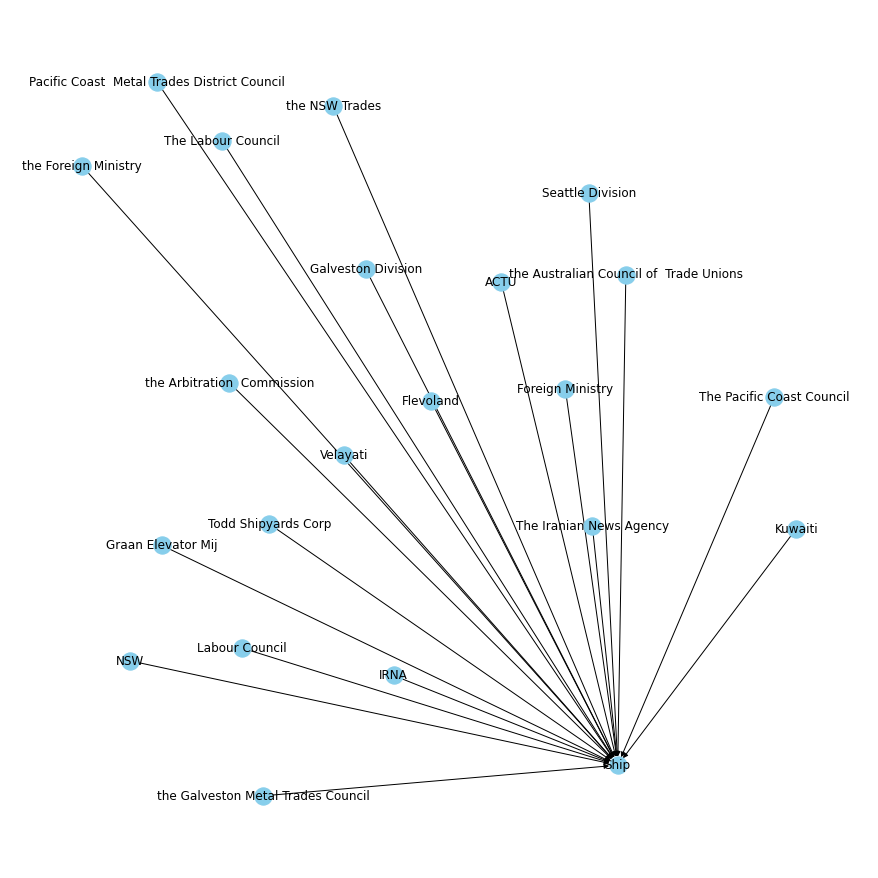

In [16]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Well, this is not exactly what we were hoping for (still looks quite a sight though!).

It turns out that we have created a graph with all the relations that we had. It becomes really hard to visualize a graph with these many relations or predicates.

So, it’s advisable to use only a few important relations to visualize a graph. I will take one relation at a time. Let’s start with the relation “composed by”

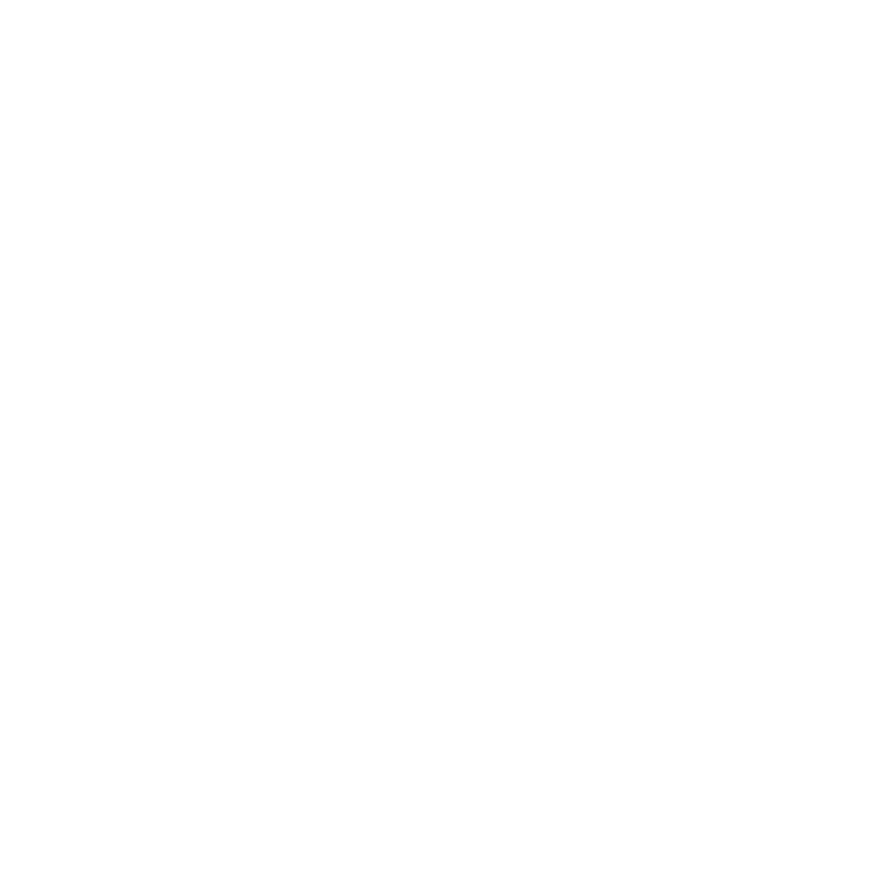

In [11]:
G=nx.from_pandas_edgelist(kg_df[kg_df['relation']=="decides"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()